In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
# Check font-list
import matplotlib.font_manager
fontlist = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(fontlist[:3])

['DejaVu Serif', 'DejaVu Sans Mono', 'cmss10']


# 解決中文亂碼
[reference](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)

- 查詢字體設定檔路徑
```
import matplotlib
matplotlib.matplotlib_fname()
```
- 將font.family與font.serif註解(#)移除，並在font.serif後方加入Microsoft JhengHei
- font.sans-serif : Microsoft JhengHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
- 下載字體 ttf 檔案並且重新命名 (msj.ttf)
- 放到 mpl-data/ttf 下面
- 刪除matplotlib快取資料夾 (`.cache/matplotlib`)
- 重新啟動 kernel

In [37]:
# 查詢字體設定檔路徑
import matplotlib
matplotlib.matplotlib_fname()

'/home/shihyen/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [64]:
def table_to_data(dataframe):
    cols = dataframe.columns
    data["class"] = dataframe[cols[0]].tolist()
    data["counts"] = dataframe[cols[1]].tolist()
    return data

def plot_pie_chart_with_others(data, max_num=6):
    classes = data["class"]
    counts = data["counts"]
    
    # Handling "Others" for classes beyond the 6th
    if len(classes) > max_num:
        classes = classes[:max_num] + ["Others"]
        counts = counts[:max_num] + [sum(counts[max_num:])]
    
    # Plotting the pie chart
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(20, 16))
    plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140)
    # plt.show()
    plt.savefig('foo.png')

In [ ]:
# plot positions
df_pos = pd.read_excel(open('tables/2024-02.xlsx', 'rb'), sheet_name='position')
data_pos = table_to_data(df_pos.iloc[:70])
plot_pie_chart_with_others(data_pos, 24)

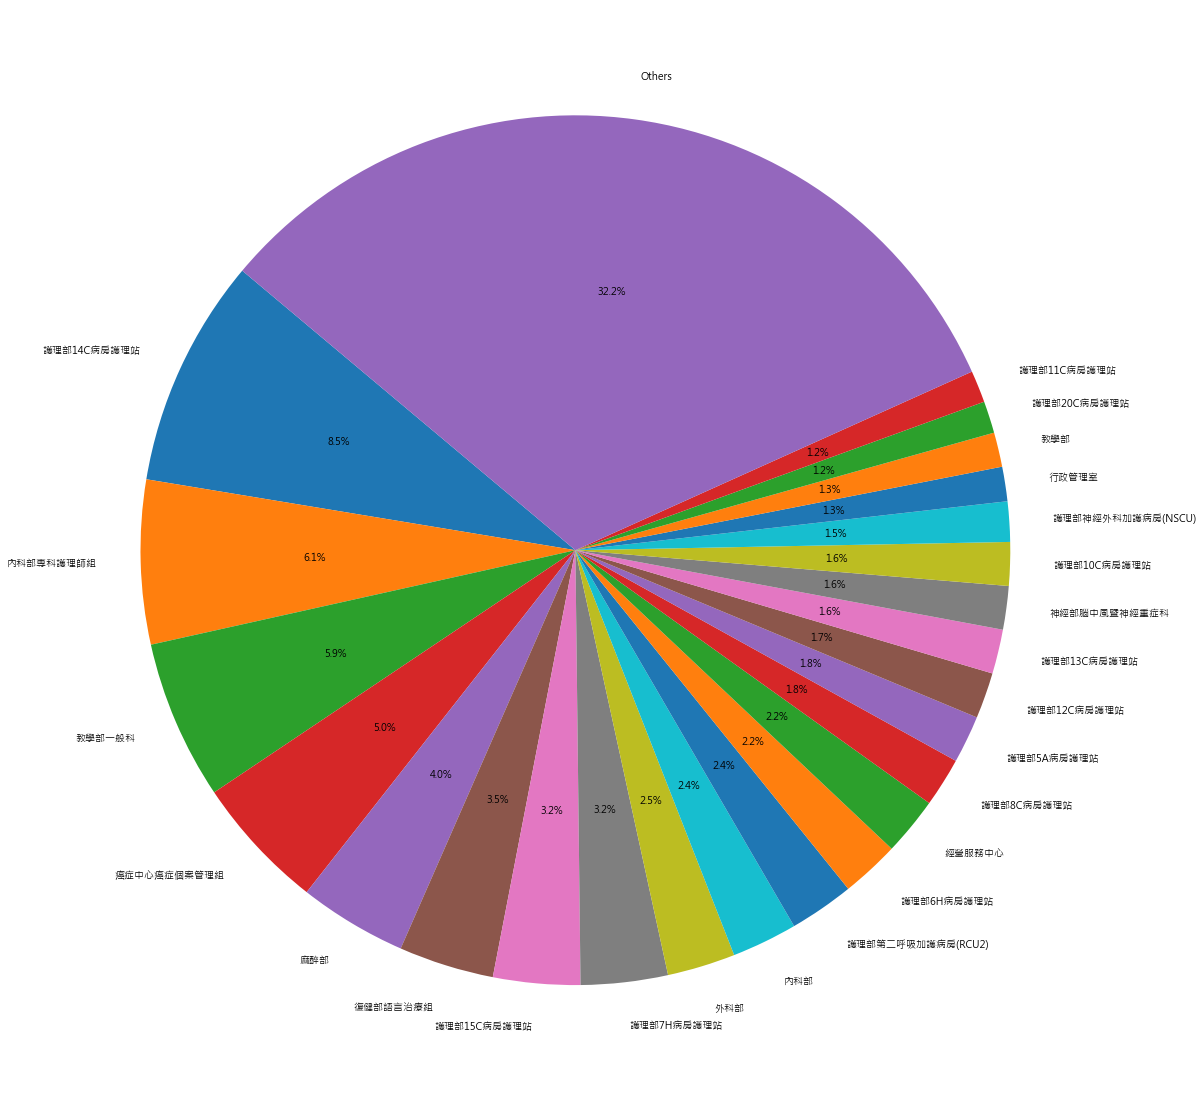

In [48]:
df_dep = pd.read_excel(open('tables/2024-02.xlsx', 'rb'), sheet_name='department_status')
data_dep = table_to_data(df_dep.iloc[:70])
plot_pie_chart_with_others(data_dep, 24)

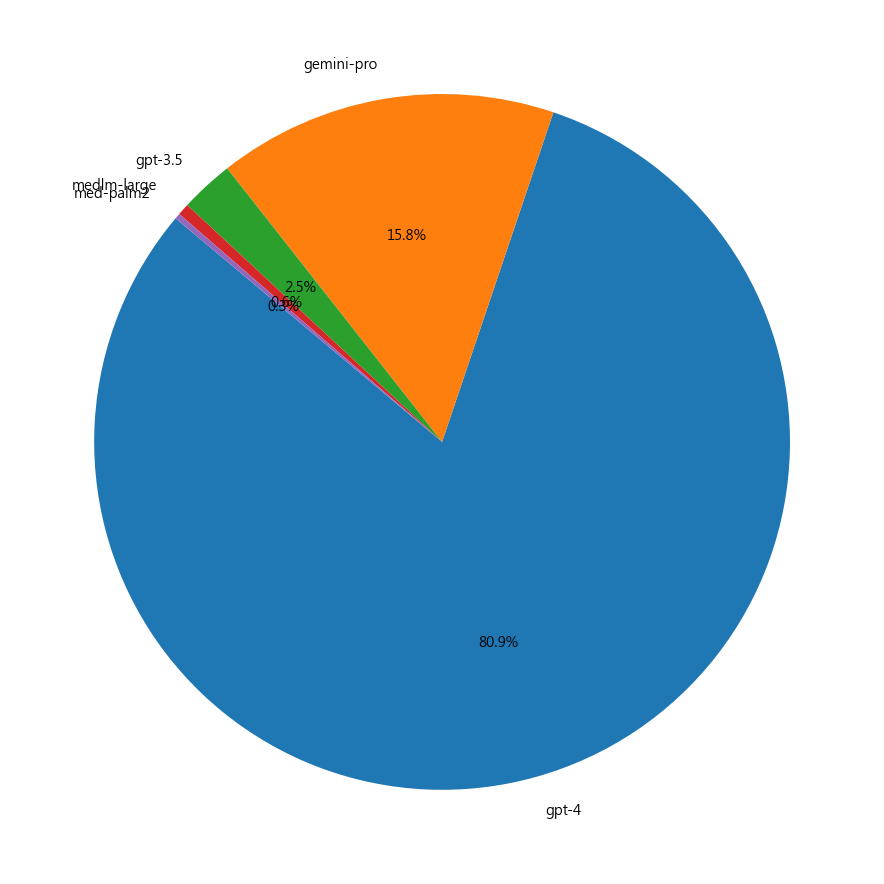

In [65]:
df_llm = pd.read_excel(open('tables/2024-02.xlsx', 'rb'), sheet_name='llm_model')
df_llm = df_llm.drop(index=[1,5, 7 ,8])
data_llm = table_to_data(df_llm)
plot_pie_chart_with_others(data_dep, 8)

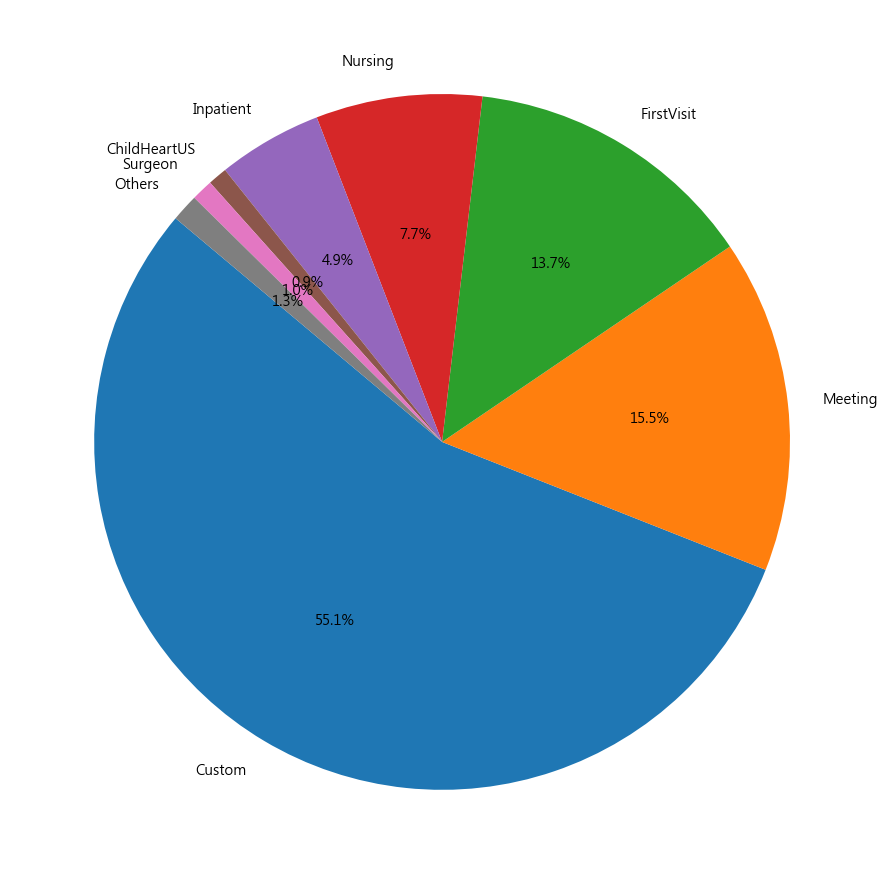

In [69]:
df_scene = pd.read_excel(open('tables/2024-02.xlsx', 'rb'), sheet_name='scene_type')
# df_llm = df_llm.drop(index=[1,5, 7 ,8])
data_scene = table_to_data(df_scene)
plot_pie_chart_with_others(data_scene, 7)